<a href="https://colab.research.google.com/github/Garehmalika/Prediction-of-Protection-Stops-for-a-Cobot/blob/main/Prediction_of_Protection_Stops_for_a_Cobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploration et prétraitement des données**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)


In [3]:
# Remplace le nom par celui que tu utilises réellement
df = pd.read_excel('/content/data.xlsx')

# Affichage des 5 premières lignes
display(df.head())


,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,Current_J5,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,-0.062540,32.2500,-0.152622,32.0000,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,-1.062762,32.2500,-0.260764,32.0000,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,-0.668869,32.3125,0.039071,32.0625,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,-0.819755,32.2500,0.153903,32.0000,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,-0.966427,32.3125,0.178998,32.0000,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False


In [4]:
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

# Info générale
df_info = pd.DataFrame({
    "Colonnes": df.columns,
    "Type": df.dtypes,
    "Valeurs manquantes": df.isnull().sum(),
    "% manquantes": (df.isnull().mean() * 100).round(2)
})
display(df_info)


Nombre de lignes : 7409
Nombre de colonnes : 24


,Colonnes,Type,Valeurs manquantes,% manquantes
Num,Num,int64,0,0.00
Timestamp,Timestamp,object,0,0.00
Current_J0,Current_J0,float64,46,0.62
Temperature_T0,Temperature_T0,float64,54,0.73
Current_J1,Current_J1,float64,54,0.73
Temperature_J1,Temperature_J1,float64,54,0.73
Current_J2,Current_J2,float64,54,0.73
Temperature_J2,Temperature_J2,float64,54,0.73
Current_J3,Current_J3,float64,54,0.73
Temperature_J3,Temperature_J3,float64,54,0.73


In [5]:
# Imputation des colonnes numériques par la moyenne
for col in df.columns:
    if df[col].dtype in ['float64', 'int64'] and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)


<ipython-input-5-f62fc8acd8f9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [6]:
# Vérifions qu'il n'y a plus de valeurs manquantes
display(df.isnull().sum().to_frame("Valeurs Manquantes Totales"))

# Doublons
print(f"Doublons : {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)


,Valeurs Manquantes Totales
Num,0
Timestamp,0
Current_J0,0
Temperature_T0,0
Current_J1,0
Temperature_J1,0
Current_J2,0
Temperature_J2,0
Current_J3,0
Temperature_J3,0


Doublons : 0


In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


In [8]:
df.to_csv("/content/UR3_clean_ready.csv", index=False)
print(" Données nettoyées et sauvegardées.")


 Données nettoyées et sauvegardées.


In [9]:
from IPython.display import display

# Affichage des statistiques descriptives
display(df.describe().T)


,count,mean,std,min,25%,50%,75%,max
Num,7409.0,3705.000000,2138.938405,1.000000,1853.000000,3705.000000,5557.000000,7409.000000
Current_J0,7409.0,-0.048934,0.826816,-6.247756,-0.193958,-0.079556,0.094239,6.806938
Temperature_T0,7409.0,34.906781,2.751972,27.812500,33.000000,36.500000,37.062500,37.250000
Current_J1,7409.0,-2.297936,0.797527,-5.808734,-2.661886,-2.241549,-1.781414,1.083596
Temperature_J1,7409.0,37.659636,3.235458,29.312500,35.375000,39.687500,40.125000,40.500000
Current_J2,7409.0,-1.199381,0.607757,-4.171966,-1.549657,-1.080292,-0.839890,2.464940
Temperature_J2,7409.0,38.064064,3.299855,29.375000,35.812500,40.187500,40.437500,40.937500
Current_J3,7409.0,-0.605312,0.513057,-3.333102,-0.827201,-0.573241,-0.390375,2.270268
Temperature_J3,7409.0,40.936999,3.170779,32.125000,38.937500,43.062500,43.125000,43.437500
Current_J4,7409.0,-0.022968,0.628486,-4.738406,-0.124975,-0.013624,0.084990,4.089389


**Identification des valeurs aberrantes**

 Valeurs aberrantes détectées AVANT traitement :
Colonne : Num | Nombre d'outliers : 0
Colonne : Current_J0 | Nombre d'outliers : 978
Colonne : Temperature_T0 | Nombre d'outliers : 0
Colonne : Current_J1 | Nombre d'outliers : 424
Colonne : Temperature_J1 | Nombre d'outliers : 0
Colonne : Current_J2 | Nombre d'outliers : 323
Colonne : Temperature_J2 | Nombre d'outliers : 0
Colonne : Current_J3 | Nombre d'outliers : 591
Colonne : Temperature_J3 | Nombre d'outliers : 104
Colonne : Current_J4 | Nombre d'outliers : 1317
Colonne : Temperature_J4 | Nombre d'outliers : 139
Colonne : Current_J5 | Nombre d'outliers : 34
Colonne : Temperature_J5 | Nombre d'outliers : 22
Colonne : Speed_J0 | Nombre d'outliers : 3247
Colonne : Speed_J1 | Nombre d'outliers : 2989
Colonne : Speed_J2 | Nombre d'outliers : 2727
Colonne : Speed_J3 | Nombre d'outliers : 3466
Colonne : Speed_J4 | Nombre d'outliers : 3166
Colonne : Speed_J5 | Nombre d'outliers : 3198
Colonne : Tool_current | Nombre d'outliers : 1097
Colonn

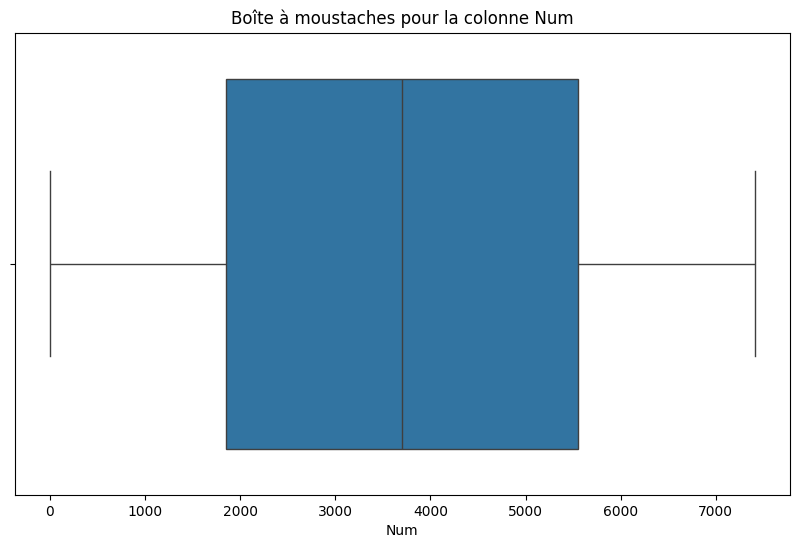

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que 'data' est le sous-dataframe contenant uniquement les colonnes numériques
data = df.select_dtypes(include=['float64', 'int64']).copy()

# Fonction de détection des outliers selon l'IQR
def detect_outliers_iqr(dataframe):
    outliers = {}
    for col in dataframe.columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
    return outliers

# Détection des valeurs aberrantes avant traitement
outliers_before = detect_outliers_iqr(data)

# Affichage du nombre de valeurs aberrantes par colonne
print(" Valeurs aberrantes détectées AVANT traitement :")
for col, outlier_df in outliers_before.items():
    print(f"Colonne : {col} | Nombre d'outliers : {len(outlier_df)}")

# Exemple de visualisation avec une boîte à moustaches pour une variable
col_to_plot = data.columns[0]  # Remplace par la colonne que tu veux visualiser
plt.figure(figsize=(10, 6))
sns.boxplot(x=data[col_to_plot])
plt.title(f'Boîte à moustaches pour la colonne {col_to_plot}')
plt.show()

In [11]:
# Remplacer les valeurs anormales par la valeur la plus fréquente (mode)
mode_value = df['Robot_ProtectiveStop'].mode()[0]  # Récupérer la valeur la plus fréquente (mode)
df['Robot_ProtectiveStop'] = df['Robot_ProtectiveStop'].apply(lambda x: mode_value if x not in [0, 1] else x)


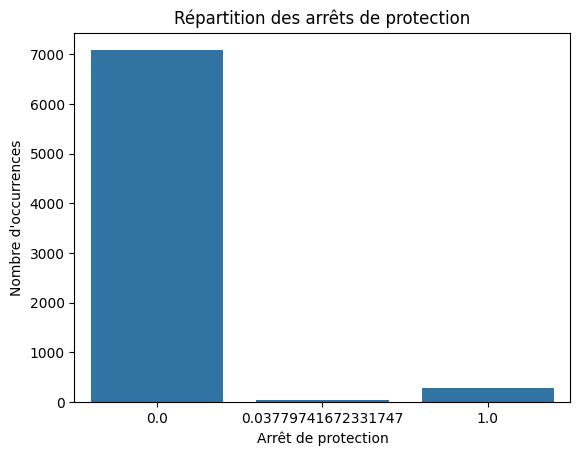

,proportion
Robot_ProtectiveStop,
0.000000,95.518963
1.000000,3.752193
0.037797,0.728843


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remplacer les NaN dans la cible si nécessaire (par exemple par 0 si on suppose qu'absence = pas d'arrêt)
df['Robot_ProtectiveStop'] = df['Robot_ProtectiveStop'].fillna(0)

# Distribution des valeurs de la cible
sns.countplot(x='Robot_ProtectiveStop', data=df)
plt.title("Répartition des arrêts de protection")
plt.xlabel("Arrêt de protection")
plt.ylabel("Nombre d'occurrences")
plt.show()

# Afficher aussi les proportions
display(df['Robot_ProtectiveStop'].value_counts(normalize=True) * 100)


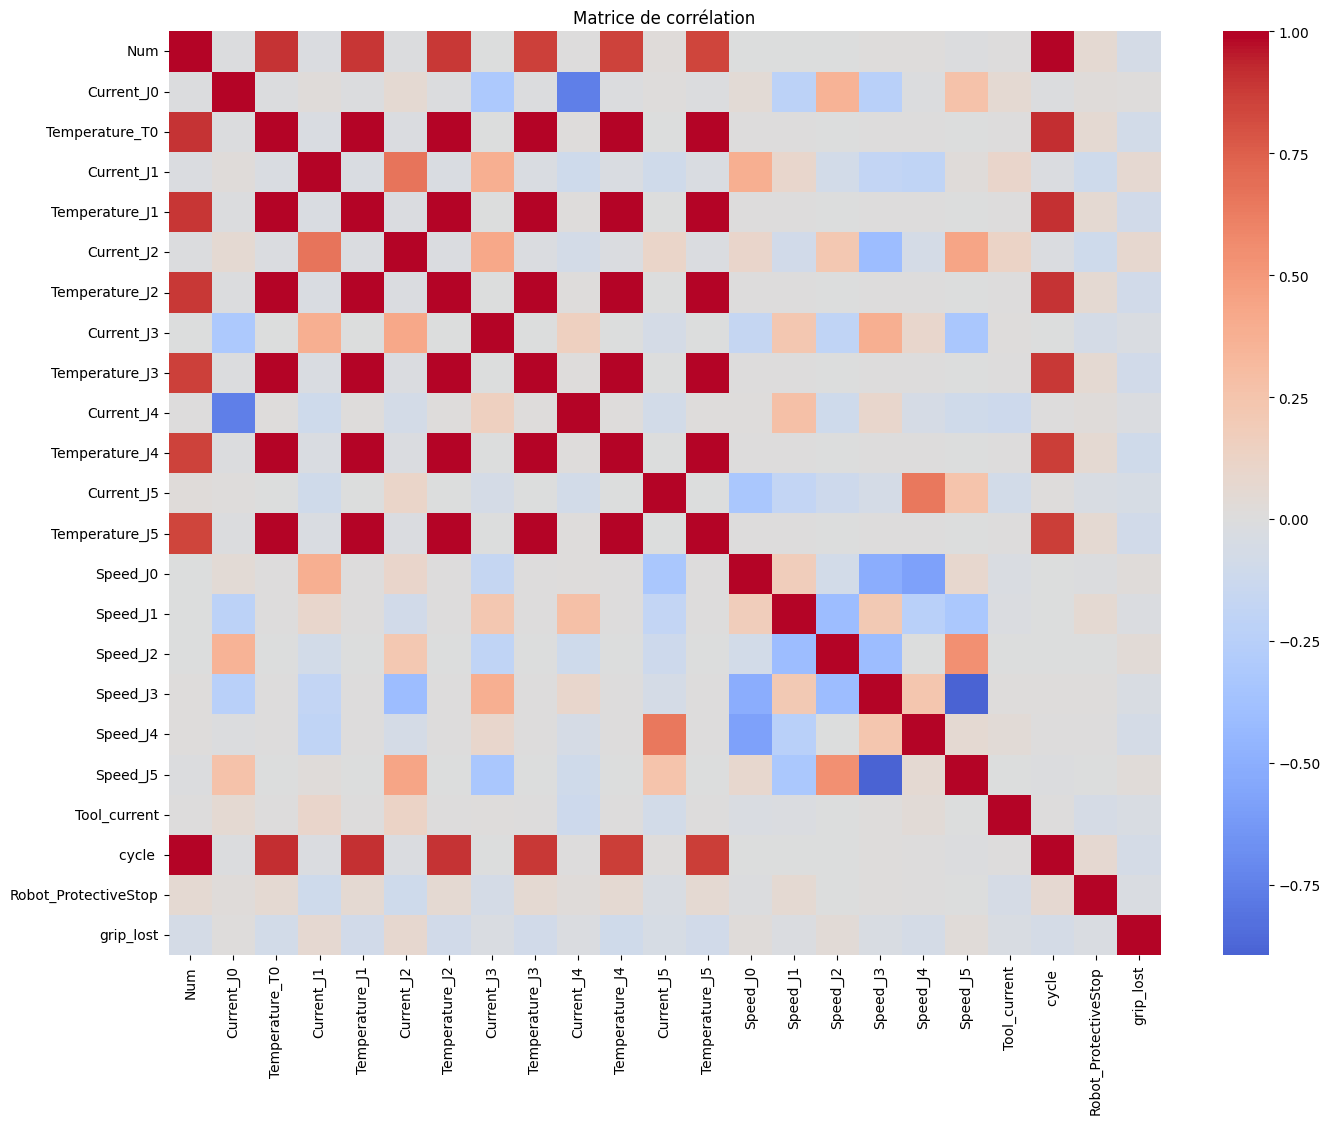

In [14]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)

# Affichage de la heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()


In [15]:
#  afficher les 10 variables les plus corrélées avec Robot_ProtectiveStop
target_corr = correlation_matrix["Robot_ProtectiveStop"].drop("Robot_ProtectiveStop")
display(target_corr.abs().sort_values(ascending=False).head(10))


,Robot_ProtectiveStop
Current_J2,0.108846
Current_J1,0.108593
Current_J3,0.066130
cycle,0.061066
Temperature_T0,0.058712
Num,0.058608
Temperature_J1,0.058518
Temperature_J2,0.057929
Temperature_J4,0.056071
Temperature_J3,0.056048


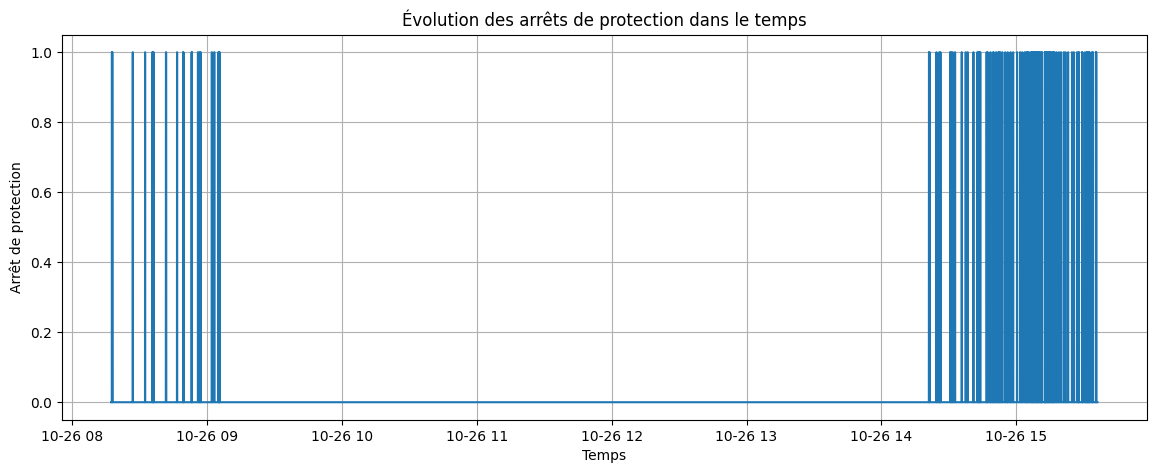

In [ ]:
#  voir les arrêts au fil du temps
plt.figure(figsize=(14, 5))
plt.plot(df['Timestamp'], df['Robot_ProtectiveStop'])
plt.title("Évolution des arrêts de protection dans le temps")
plt.xlabel("Temps")
plt.ylabel("Arrêt de protection")
plt.grid(True)
plt.show()


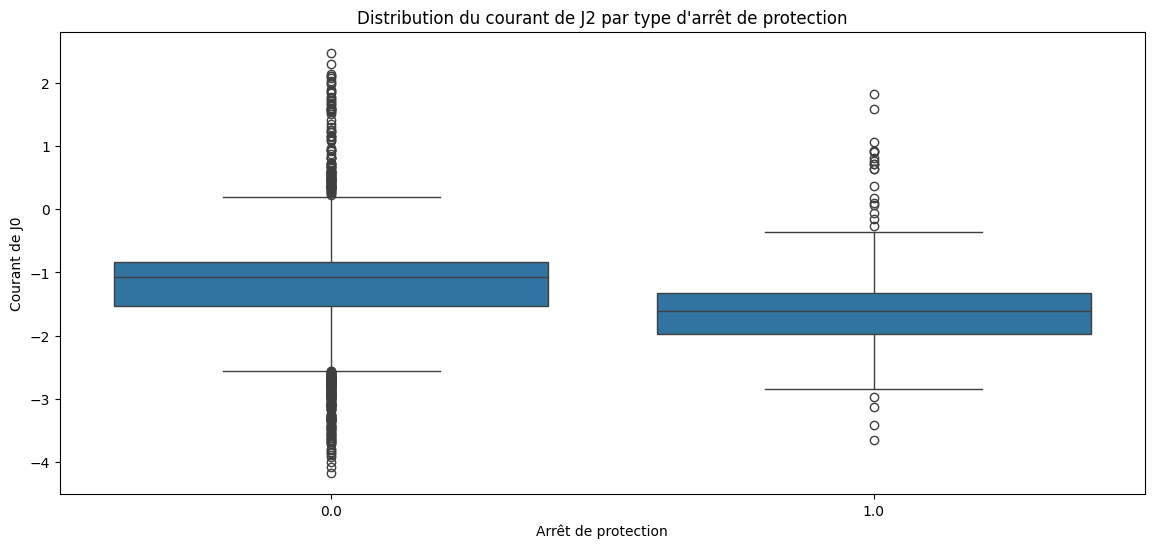

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Robot_ProtectiveStop', y='Current_J2', data=df)
plt.title("Distribution du courant de J2 par type d'arrêt de protection")
plt.xlabel("Arrêt de protection")
plt.ylabel("Courant de J2")
plt.show()


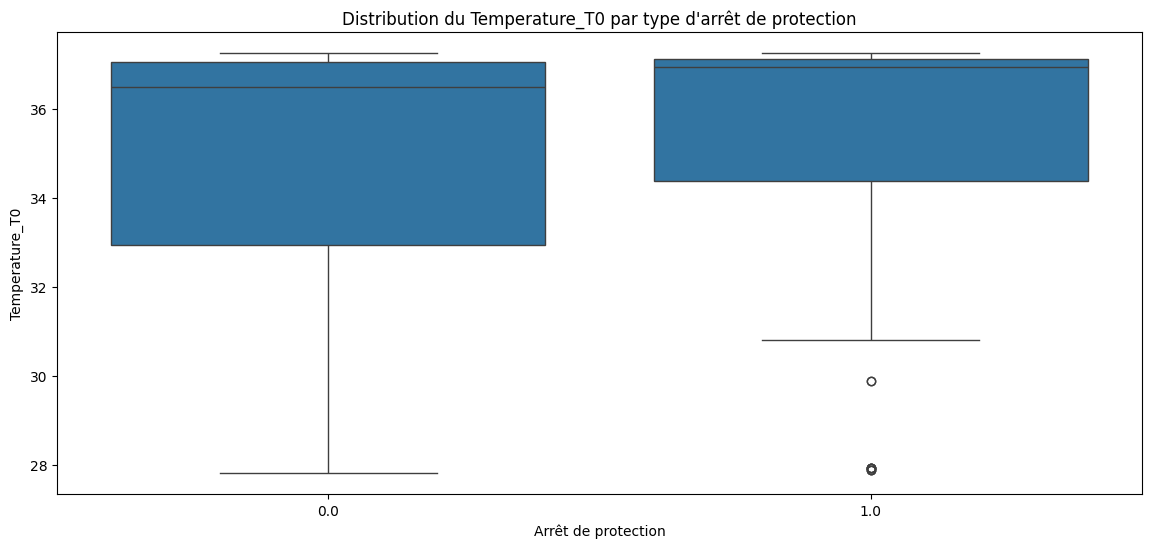

In [ ]:
plt.figure(figsize=(14, 6))

sns.boxplot(x='Robot_ProtectiveStop', y='Temperature_T0', data=df)
plt.title("Distribution du Temperature_T0 par type d'arrêt de protection")
plt.xlabel("Arrêt de protection")
plt.ylabel("Temperature_T0")
plt.show()

PCA

══════════════════════════════════════════════════
ANALYSE EN COMPOSANTES PRINCIPALES (PCA)
══════════════════════════════════════════════════

──────────────────────────────────────────────────
Variance expliquée par chaque composante :
──────────────────────────────────────────────────
Composante 1: 34.77%
Composante 2: 14.40%
Composante 3: 11.25%
Composante 4: 8.72%
Composante 5: 7.03%
Composante 6: 4.94%
Composante 7: 4.61%
Composante 8: 4.20%
Composante 9: 3.03%
Composante 10: 1.71%

──────────────────────────────────────────────────
Variance cumulée :
──────────────────────────────────────────────────
1 composantes: 34.77%
2 composantes: 49.17%
3 composantes: 60.42%
4 composantes: 69.14%
5 composantes: 76.17%
6 composantes: 81.11%
7 composantes: 85.72%
8 composantes: 89.92%
9 composantes: 92.96%
10 composantes: 94.67%


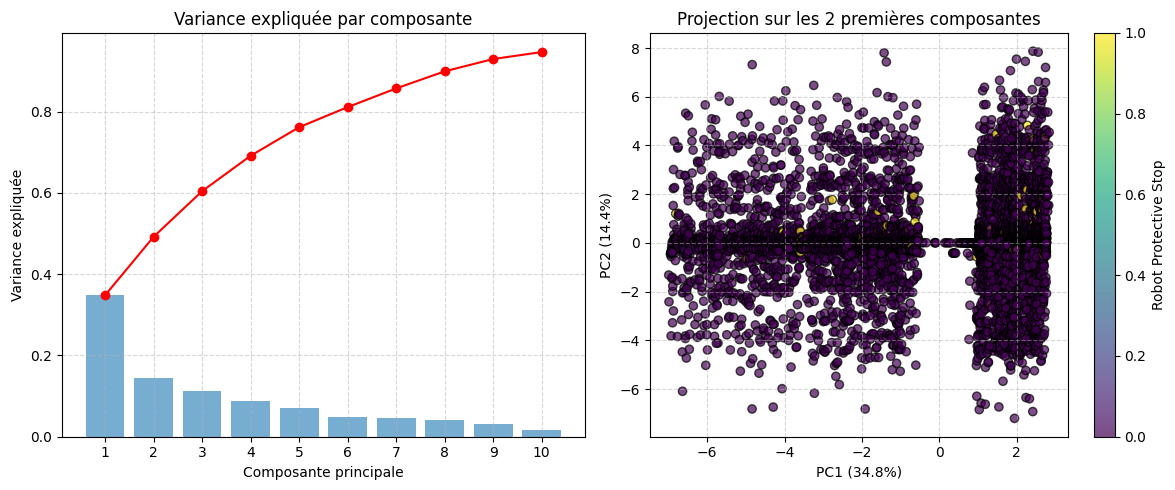


══════════════════════════════════════════════════
DONNÉES TRANSFORMÉES (5 premières lignes)
══════════════════════════════════════════════════
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -6.921311 -0.217268 -1.266114 -1.595068 -0.191600 -0.520389 -0.170619   
1 -6.930328 -0.558690 -0.782409  0.308550 -3.131831  1.582270 -3.325137   
2 -6.870011  3.013145  0.201943 -1.109127 -1.343352 -2.520112  0.373730   
3 -6.911116 -1.458850  2.119202 -0.654955  0.684275 -1.117214 -0.114188   
4 -6.891091 -1.990965  1.795024 -2.419887 -0.098485 -2.492241  0.027922   

        PC8       PC9      PC10  
0 -0.322291 -0.839901  1.119096  
1  2.698967  0.441063 -0.443887  
2  0.207772 -1.236880 -0.944783  
3  0.122326  0.713165 -1.036107  
4  0.611971  0.059979  0.672171  

══════════════════════════════════════════════════
COMPOSANTES PRINCIPALES (chargements)
══════════════════════════════════════════════════
                     PC1       PC2       PC3       PC4     

In [34]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supposons que vous avez déjà un DataFrame `df`
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Séparer les caractéristiques et la cible
X = df.drop(columns=['Robot_ProtectiveStop', 'Timestamp'])
y = df['Robot_ProtectiveStop']

# 1. Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Application du PCA pour réduire à 10 composants principaux
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# 3. Affichage amélioré des résultats du PCA
print("═"*50)
print("ANALYSE EN COMPOSANTES PRINCIPALES (PCA)")
print("═"*50)

# Tableau de variance expliquée
print("\n" + "─"*50)
print("Variance expliquée par chaque composante :")
print("─"*50)
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"Composante {i}: {var*100:.2f}%")

# Variance cumulée
print("\n" + "─"*50)
print("Variance cumulée :")
print("─"*50)
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(cumulative_var, 1):
    print(f"{i} composantes: {var*100:.2f}%")

# 4. Visualisation améliorée
plt.figure(figsize=(12, 5))

# Variance expliquée
plt.subplot(1, 2, 1)
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.6)
plt.plot(range(1, 11), cumulative_var, 'r-o')
plt.title('Variance expliquée par composante')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.5)

# Projection des données
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis',
                     alpha=0.7, edgecolor='k')
plt.title('Projection sur les 2 premières composantes')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.colorbar(scatter, label='Robot Protective Stop')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 5. Affichage des données transformées
print("\n" + "═"*50)
print("DONNÉES TRANSFORMÉES (5 premières lignes)")
print("═"*50)
pca_df = pd.DataFrame(X_pca[:5],
                     columns=[f'PC{i+1}' for i in range(10)],
                     index=df.index[:5])
print(pca_df)

# 6. Composantes principales (chargements)
print("\n" + "═"*50)
print("COMPOSANTES PRINCIPALES (chargements)")
print("═"*50)
loadings = pd.DataFrame(pca.components_.T,
                       columns=[f'PC{i+1}' for i in range(10)],
                       index=X.columns)
print(loadings)

In [32]:
# Sélectionner les attributs avec PCA
from sklearn.decomposition import PCA
import joblib
def reductionPCA(X, n_components):
  pca = PCA(n_components)
  data_reduced = pca.fit_transform(X)
  joblib.dump(pca, 'pca.pkl')
  return data_reduced

** Normalisation**

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

X = df.drop(columns=['Robot_ProtectiveStop'])
y = df['Robot_ProtectiveStop']


datetime_cols = X.select_dtypes(include=['datetime64[ns, UTC]']).columns
for col in datetime_cols:

    X[col] = X[col].dt.tz_localize(None).astype(np.int64) // 10**9

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




In [22]:
import pickle

# Sauvegarder l'objet scaler dans un fichier .pkl
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

**Modele**


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Diviser les données en ensembles d’entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Taille de la séquence
sequence_length = 10

# Ajuster la taille pour être compatible avec sequence_length
n_samples = X_train.shape[0]
n_features = X_train.shape[1]
new_n_samples = (n_samples // sequence_length) * sequence_length
X_train = X_train[:new_n_samples]
X_train = X_train.reshape((-1, sequence_length, n_features))

# Réappliquer la même logique à X_test
n_samples_test = X_test.shape[0]
new_n_samples_test = (n_samples_test // sequence_length) * sequence_length
X_test = X_test[:new_n_samples_test]
X_test = X_test.reshape((-1, sequence_length, n_features))

print("Shape de X_train après reshape:", X_train.shape)
print("Shape de X_test après reshape:", X_test.shape)


Shape de X_train après reshape: (592, 10, 23)
Shape de X_test après reshape: (148, 10, 23)


**Création du modèle LSTM**

In [57]:
pip install tf

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


# Créer le générateur pour l'entraînement
train_generator = TimeseriesGenerator(X_scaled, y, length=10, batch_size=32)

# Créer le générateur pour le test
test_generator = TimeseriesGenerator(X_scaled, y, length=10, batch_size=32)

# Définir un modèle simple LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(10, X_scaled.shape[1])))
model.add(Dense(1, activation='sigmoid'))  # Utiliser sigmoid pour classification binaire

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(train_generator, epochs=10, validation_data=test_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9466 - loss: 0.2766 - val_accuracy: 0.9624 - val_loss: 0.1622
Epoch 2/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9687 - loss: 0.1687 - val_accuracy: 0.9624 - val_loss: 0.1323
Epoch 3/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9665 - loss: 0.1187 - val_accuracy: 0.9626 - val_loss: 0.1243
Epoch 4/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9631 - loss: 0.1238 - val_accuracy: 0.9630 - val_loss: 0.1136
Epoch 5/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9681 - loss: 0.1092 - val_accuracy: 0.9632 - val_loss: 0.1136
Epoch 6/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9635 - loss: 0.1159 - val_accuracy: 0.9643 - val_loss: 0.1045
Epoch 7/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9641 - loss: 0.1081 - val_accuracy: 0.9646 - val_loss: 0.0994
Epoch 8/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9628 - loss: 0.1103 - val_accu

**evaluation**

232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Valeurs uniques dans y_pred_classes: [0 1]
Valeurs uniques dans y_true: [0. 1.]


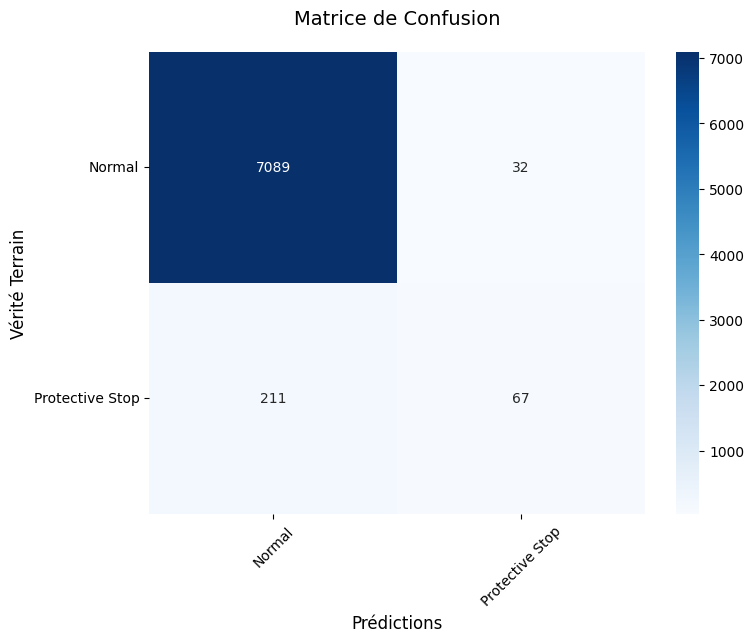

Accuracy: 0.967157724016759
Recall: 0.24100719424460432
F1-Score: 0.35543766578249336

Rapport de classification :
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7121
           1       0.68      0.24      0.36       278

    accuracy                           0.97      7399
   macro avg       0.82      0.62      0.67      7399
weighted avg       0.96      0.97      0.96      7399



In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score

y_pred = model.predict(test_generator)

y_pred_classes = (y_pred > 0.5).astype(int)

print("Valeurs uniques dans y_pred_classes:", np.unique(y_pred_classes))

y_true = []
for i in range(len(test_generator)):
    _, y_batch = test_generator[i]
    y_true.extend(y_batch)

y_true = np.array(y_true)

print("Valeurs uniques dans y_true:", np.unique(y_true))
y_true = (y_true > 0.5).astype(int)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualisation graphique
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Normal', 'Protective Stop'],
            yticklabels=['Normal', 'Protective Stop'])

plt.title('Matrice de Confusion', fontsize=14, pad=20)
plt.xlabel('Prédictions', fontsize=12)
plt.ylabel('Vérité Terrain', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Calculer l'accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Calculer le recall
recall = recall_score(y_true, y_pred_classes)
print(f"Recall: {recall}")

# Calculer le F1-score
f1 = f1_score(y_true, y_pred_classes)
print(f"F1-Score: {f1}")
print("\nRapport de classification :\n", classification_report(y_true, y_pred_classes))


In [33]:
from joblib import dump
import tensorflow as tf

# Sauvegarder le modèle et le scaler dans un seul fichier
model_data = {
    'model': model,
    'scaler': scaler,
    'input_shape': (10, X_train.shape[1])  # Conserver les métadonnées
}

dump(model_data, 'modele_robot_protect.pkl')

# Pour les modèles Keras, il est recommandé de sauvegarder aussi au format native
model.save('modele_robot_protect.h5')

**GRU**

In [41]:
from tensorflow.keras.layers import GRU, Bidirectional, Attention, Input, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np
import pandas as pd

# 1. Préparation des données
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
X = df.drop(columns=['Robot_ProtectiveStop', 'Timestamp'])
y = df['Robot_ProtectiveStop'].values  # Conversion explicite en numpy array

# 2. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Réduction PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
print(f"Forme après PCA: {X_pca.shape}")

# 4. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Important pour garder la distribution des classes
)

# 5. Calcul des poids de classe
classes = np.unique(y_train)
class_weights = compute_class_weight(
    'balanced',
    classes=classes,
    y=y_train
)
class_weight_dict = dict(zip(classes, class_weights))

# 6. Création des générateurs
train_generator = TimeseriesGenerator(
    X_train.astype('float32'),  # Conversion explicite
    y_train.astype('float32'),  # Conversion explicite
    length=10,
    batch_size=32,
    sampling_rate=1
)

test_generator = TimeseriesGenerator(
    X_test.astype('float32'),
    y_test.astype('float32'),
    length=10,
    batch_size=32,
    sampling_rate=1
)

# 7. Construction du modèle
input_shape = (10, X_train.shape[1])  # (timesteps, features)
inputs = Input(shape=input_shape)
gru_out = Bidirectional(GRU(32, return_sequences=True))(inputs)
attention = Attention()([gru_out, gru_out])
x = GlobalAveragePooling1D()(attention)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)

# 8. Compilation
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

# 9. Entraînement
history = model.fit(
    train_generator,
    epochs=10,  # Augmenté pour permettre à l'early stopping de fonctionner
    validation_data=test_generator,
    class_weight=class_weight_dict,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ],
    verbose=1
)

Forme après PCA: (7409, 10)
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5715 - loss: 0.6834 - precision: 0.0381 - recall: 0.4550 - val_accuracy: 0.4069 - val_loss: 0.7233 - val_precision: 0.0405 - val_recall: 0.6429
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.3986 - loss: 0.7147 - precision: 0.0420 - recall: 0.6362 - val_accuracy: 0.5870 - val_loss: 0.6780 - val_precision: 0.0446 - val_recall: 0.4821
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6138 - loss: 0.6747 - precision: 0.0492 - recall: 0.5111 - val_accuracy: 0.4973 - val_loss: 0.7020 - val_precision: 0.0428 - val_recall: 0.5714
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5999 - loss: 0.6782 - precision: 0.0493 - recall: 0.5317 - val_accuracy: 0.6094 - val_loss: 0.6630 - val_precision: 0.0487 - val_recall: 0.5000
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6760 - loss: 0.6422 - precision: 0.0611 - recall: 0.5542 - val_accuracy: 0.5679 - val_loss: 0.6799 -

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Valeurs uniques dans y_pred_classes: [0 1]
Valeurs uniques dans y_true: [0. 1.]


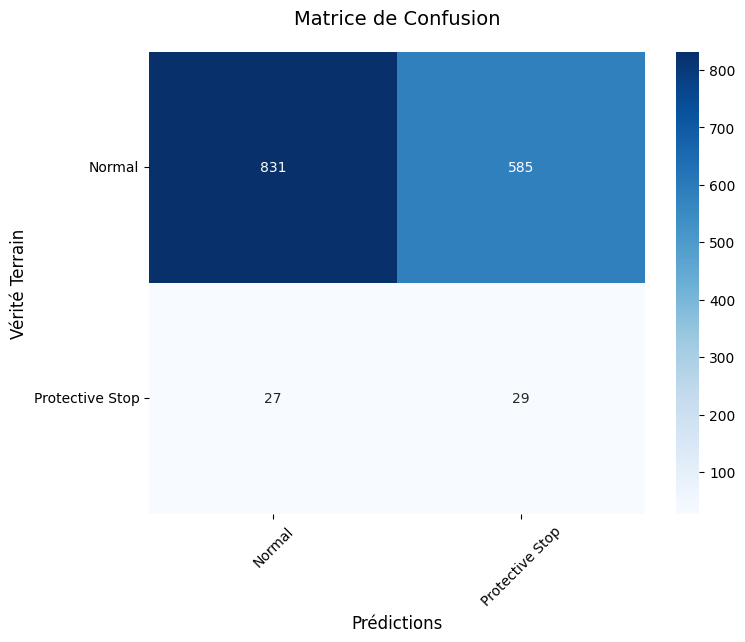

Accuracy: 0.5842391304347826
Recall: 0.5178571428571429
F1-Score: 0.08656716417910448

Rapport de classification :
               precision    recall  f1-score   support

           0       0.97      0.59      0.73      1416
           1       0.05      0.52      0.09        56

    accuracy                           0.58      1472
   macro avg       0.51      0.55      0.41      1472
weighted avg       0.93      0.58      0.71      1472



In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score

# Prédictions avec le modèle sur les données de test
y_pred = model_gru.predict(test_generator)

# Conversion des prédictions en classes binaires
y_pred_classes = (y_pred > 0.5).astype(int)

# Afficher les valeurs uniques dans les prédictions
print("Valeurs uniques dans y_pred_classes:", np.unique(y_pred_classes))

# Collecter les vraies étiquettes (y_true) à partir du générateur de test
y_true = []
for i in range(len(test_generator)):
    _, y_batch = test_generator[i]
    y_true.extend(y_batch)

y_true = np.array(y_true)

# Afficher les valeurs uniques dans les vraies étiquettes
print("Valeurs uniques dans y_true:", np.unique(y_true))

# Conversion des vraies étiquettes en classes binaires
y_true = (y_true > 0.5).astype(int)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualisation graphique de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Normal', 'Protective Stop'],
            yticklabels=['Normal', 'Protective Stop'])

plt.title('Matrice de Confusion', fontsize=14, pad=20)
plt.xlabel('Prédictions', fontsize=12)
plt.ylabel('Vérité Terrain', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Calculer l'accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Calculer le recall
recall = recall_score(y_true, y_pred_classes)
print(f"Recall: {recall}")

# Calculer le F1-score
f1 = f1_score(y_true, y_pred_classes)
print(f"F1-Score: {f1}")

# Afficher le rapport de classification
print("\nRapport de classification :\n", classification_report(y_true, y_pred_classes))

In [43]:
import pickle

# Sauvegarder les poids du modèle en format Pickle (.pkl)
with open('model_gru_weights.pkl', 'wb') as f:
    pickle.dump(model_gru.get_weights(), f)

print("Poids du modèle enregistrés en 'model_gru_weights.pkl'")

Poids du modèle enregistrés en 'model_gru_weights.pkl'


RNN

In [24]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# 1. Préparation des données (exemple avec vos dimensions)
# Supposons que vos données sont déjà prêtes sous forme de séquences
# X_train : (n_samples, time_steps, n_features)
# y_train : (n_samples,)

time_steps = 10  # Ajustez selon vos besoins
n_features = 21  # Nombre de caractéristiques par pas de temps

# Données d'exemple (remplacez par vos vraies données)
X_train = np.random.rand(1000, time_steps, n_features)  # 1000 séquences
y_train = np.random.randint(0, 2, 1000)                # Labels binaires
X_test = np.random.rand(200, time_steps, n_features)
y_test = np.random.randint(0, 2, 200)

# 2. Construction du modèle RNN avec une couche SimpleRNN
model = Sequential([
    SimpleRNN(64, return_sequences=False, input_shape=(time_steps, n_features)),  # Première couche RNN
    Dropout(0.2),  # Dropout pour éviter le sur-apprentissage
    Dense(1, activation='sigmoid')  # Couche de sortie avec activation sigmoïde pour la classification binaire
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3. Entraînement du modèle
early_stop = EarlyStopping(monitor='val_loss', patience=5)  # Early stopping pour éviter le sur-apprentissage
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop],
                    verbose=1)

# 4. Évaluation et prédiction
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Prédictions sur les données de test

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur le test set: {accuracy:.4f}")

# Sauvegarde du modèle
model.save('modele_rnn_simple.h5')
print("Modèle sauvegardé sous 'modele_rnn_simple.h5'")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.4951 - loss: 0.7202 - val_accuracy: 0.5450 - val_loss: 0.6840
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5510 - loss: 0.6944 - val_accuracy: 0.5350 - val_loss: 0.6857
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5631 - loss: 0.6841 - val_accuracy: 0.5450 - val_loss: 0.6878
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5746 - loss: 0.6775 - val_accuracy: 0.5350 - val_loss: 0.6928
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5789 - loss: 0.6698 - val_accuracy: 0.5400 - val_loss: 0.6939
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6019 - loss: 0.6596 - val_accuracy: 0.5550 - val_loss: 0.6989
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Accuracy sur le test set: 0.5550
Modèle sauvegardé sous 'modele_rnn_simple.h5'


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5106 - loss: 0.7262 - val_accuracy: 0.5600 - val_loss: 0.6849
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5377 - loss: 0.7074 - val_accuracy: 0.5050 - val_loss: 0.7280
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5623 - loss: 0.6980 - val_accuracy: 0.4800 - val_loss: 0.7055
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5942 - loss: 0.6769 - val_accuracy: 0.4950 - val_loss: 0.7030
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5795 - loss: 0.6703 - val_accuracy: 0.4700 - val_loss: 0.7180
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5851 - loss: 0.6642 - val_accuracy: 0.5350 - val_loss: 0.7393


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Accuracy sur le test set: 0.5350
Recall sur le test set: 0.4495
F1-Score sur le test set: 0.5131
Matrice de confusion:
[[58 33]
 [60 49]]


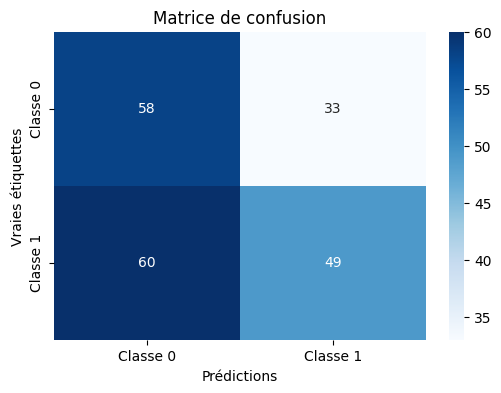


Rapport de classification:
              precision    recall  f1-score   support

           0       0.49      0.64      0.56        91
           1       0.60      0.45      0.51       109

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.55      0.54      0.53       200

Modèle sauvegardé sous 'modele_rnn_simple.h5'


In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


time_steps = 10
n_features = 21

# Données d'exemple (remplacez par vos vraies données)
X_train = np.random.rand(1000, time_steps, n_features)
y_train = np.random.randint(0, 2, 1000)
X_test = np.random.rand(200, time_steps, n_features)
y_test = np.random.randint(0, 2, 200)

model = Sequential([
    SimpleRNN(64, return_sequences=False, input_shape=(time_steps, n_features)),  # Première couche RNN
    Dropout(0.2),  # Dropout pour éviter le sur-apprentissage
    Dense(1, activation='sigmoid')  # Couche de sortie avec activation sigmoïde pour la classification binaire
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3. Entraînement du modèle
early_stop = EarlyStopping(monitor='val_loss', patience=5)  # Early stopping pour éviter le sur-apprentissage
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop],
                    verbose=1)


y_pred = (model.predict(X_test) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur le test set: {accuracy:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall sur le test set: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1-Score sur le test set: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(conf_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion')
plt.ylabel('Vraies étiquettes')
plt.xlabel('Prédictions')
plt.show()

print("\nRapport de classification:")
print(classification_report(y_test, y_pred))


model.save('modele_rnn_simple.h5')
print("Modèle sauvegardé sous 'modele_rnn_simple.h5'")


In [44]:

# Sauvegarder le modèle en utilisant Pickle
with open('rnn_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Modèle RNN sauvegardé sous forme de fichier .pkl")

Modèle RNN sauvegardé sous forme de fichier .pkl


**modèle Transformer**

In [49]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Flatten
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# 1. Préparation des données
# Supposons que X_train a shape (n_samples, n_features) après PCA
# Nous devons créer des séquences temporelles

time_steps = 10
n_features = X_train.shape[1]  # Doit être 21 selon votre modèle

# 2. Création des séquences temporelles
def create_sequences(data, targets, seq_length=time_steps):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(targets[i+seq_length])
    return np.array(X), np.array(y)

X_train_seq, y_train_seq = create_sequences(X_train, y_train)
X_test_seq, y_test_seq = create_sequences(X_test, y_test)

print(f"Shapes après création des séquences:")
print(f"X_train_seq: {X_train_seq.shape}, y_train_seq: {y_train_seq.shape}")
print(f"X_test_seq: {X_test_seq.shape}, y_test_seq: {y_test_seq.shape}")

# 3. Construction du modèle Transformer
def build_transformer(input_shape=(time_steps, n_features)):
    inputs = Input(shape=input_shape)

    # Couche d'attention multi-têtes
    attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(inputs, inputs)

    # Normalisation et dropout
    x = LayerNormalization()(attention_output + inputs)  # Residual connection
    x = Dropout(0.2)(x)

    # Classification
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)

    return Model(inputs=inputs, outputs=outputs)

# 4. Création et compilation du modèle
model_transformer = build_transformer()
model_transformer.summary()

model_transformer.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

# 5. Entraînement
history = model_transformer.fit(
    X_train_seq,
    y_train_seq,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    ],
    verbose=1
)

Shapes après création des séquences:
X_train_seq: (5917, 10, 10), y_train_seq: (5917,)
X_test_seq: (1472, 10, 10), y_test_seq: (1472,)


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23            │ (None, 10, 10)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_2    │ (None, 10, 10)         │         11,018 │ input_layer_23[0][0],  │
│ (MultiHeadAttention)      │                        │                │ input_layer_23[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 10, 10)         │              0 │ multi_head_attention_… │
│                           │                        │                │ input_layer_23[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 10, 10)         │             20 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout)      │ (None, 10, 10)         │              0 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 100)            │              0 │ dropout_19[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 64)             │          6,464 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 1)              │             65 │ dense_23[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 17,567 (68.62 KB)

 Trainable params: 17,567 (68.62 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7955 - loss: 0.4106 - precision: 0.0293 - recall: 0.1509 - val_accuracy: 0.9613 - val_loss: 0.1738 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9639 - loss: 0.1558 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9613 - val_loss: 0.1719 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9629 - loss: 0.1563 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9620 - val_loss: 0.1682 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9634 - loss: 0.1506 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9613 - val_loss: 0.1717 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9652 - loss: 0.1381 - precision: 

Shape des séquences de test: (1472, 10, 10)
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Accuracy sur le test set: 0.9620
Recall sur le test set: 0.0000
F1-Score sur le test set: 0.0000

Matrice de confusion:
[[1416    0]
 [  56    0]]


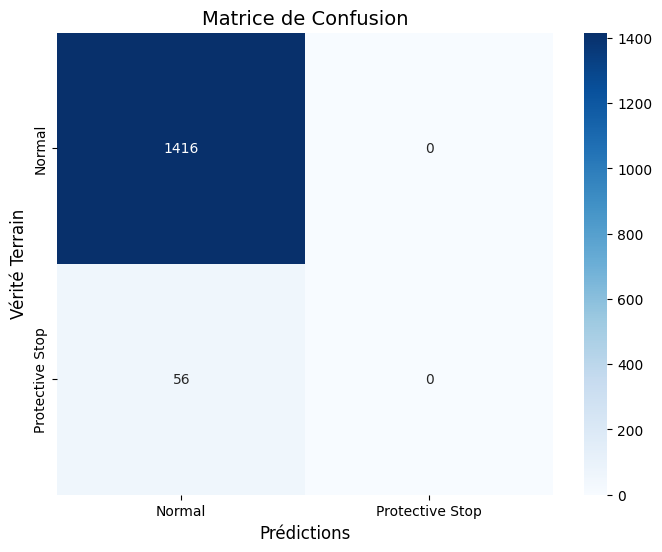


Rapport de classification détaillé:
                 precision    recall  f1-score   support

         Normal       0.96      1.00      0.98      1416
Protective Stop       0.00      0.00      0.00        56

       accuracy                           0.96      1472
      macro avg       0.48      0.50      0.49      1472
   weighted avg       0.93      0.96      0.94      1472



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Préparation des séquences de test
# Utilisez la même fonction que pour l'entraînement
def create_sequences(data, targets, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(targets[i+seq_length])
    return np.array(X), np.array(y)

X_test_seq, y_test_seq = create_sequences(X_test, y_test)

# Vérification des shapes
print(f"Shape des séquences de test: {X_test_seq.shape}")  # Doit être (n_samples, 10, n_features)

# 2. Prédictions
y_proba = model_transformer.predict(X_test_seq)
y_pred = (y_proba > 0.5).astype(int)

# 3. Évaluation
accuracy = accuracy_score(y_test_seq, y_pred)
print(f"\nAccuracy sur le test set: {accuracy:.4f}")

recall = recall_score(y_test_seq, y_pred)
print(f"Recall sur le test set: {recall:.4f}")

f1 = f1_score(y_test_seq, y_pred)
print(f"F1-Score sur le test set: {f1:.4f}")

# 4. Matrice de confusion
conf_matrix = confusion_matrix(y_test_seq, y_pred)
print("\nMatrice de confusion:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Protective Stop'],
            yticklabels=['Normal', 'Protective Stop'])
plt.title('Matrice de Confusion', fontsize=14)
plt.ylabel('Vérité Terrain', fontsize=12)
plt.xlabel('Prédictions', fontsize=12)
plt.show()

# 5. Rapport complet
print("\nRapport de classification détaillé:")
print(classification_report(y_test_seq, y_pred, target_names=['Normal', 'Protective Stop']))



In [52]:
# Sauvegarder le modèle en utilisant Pickle
with open('transformer_model.pkl', 'wb') as file:
    pickle.dump(model_transformer, file)

print("Modèle Transformer sauvegardé sous forme de fichier .pkl")

Modèle Transformer sauvegardé sous forme de fichier .pkl


**SVM**

Distribution des classes avant équilibrage:
Robot_ProtectiveStop
0.0    7131
1.0     278
Name: count, dtype: int64

Distribution des classes dans le test set:
Robot_ProtectiveStop
0.0    1430
1.0      52
Name: count, dtype: int64

Évaluation du modèle SVM avec équilibrage des classes

Accuracy: 0.8165

Rapport de classification détaillé:
                 precision    recall  f1-score   support

         Normal       0.99      0.82      0.90      1430
Protective Stop       0.12      0.67      0.20        52

       accuracy                           0.82      1482
      macro avg       0.55      0.75      0.55      1482
   weighted avg       0.96      0.82      0.87      1482



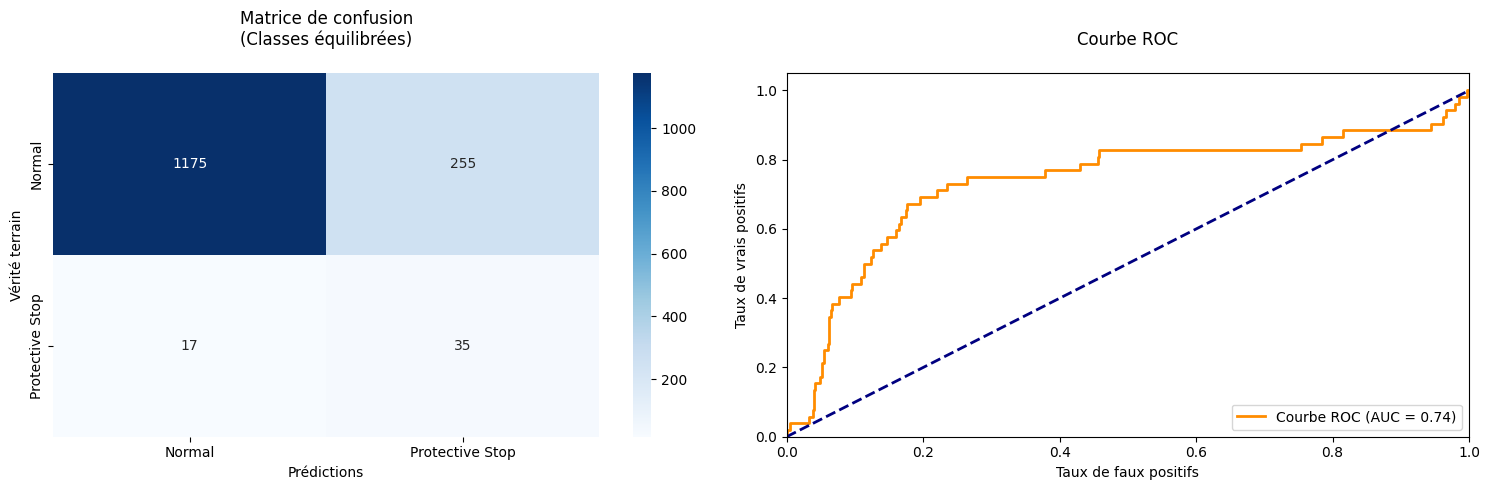

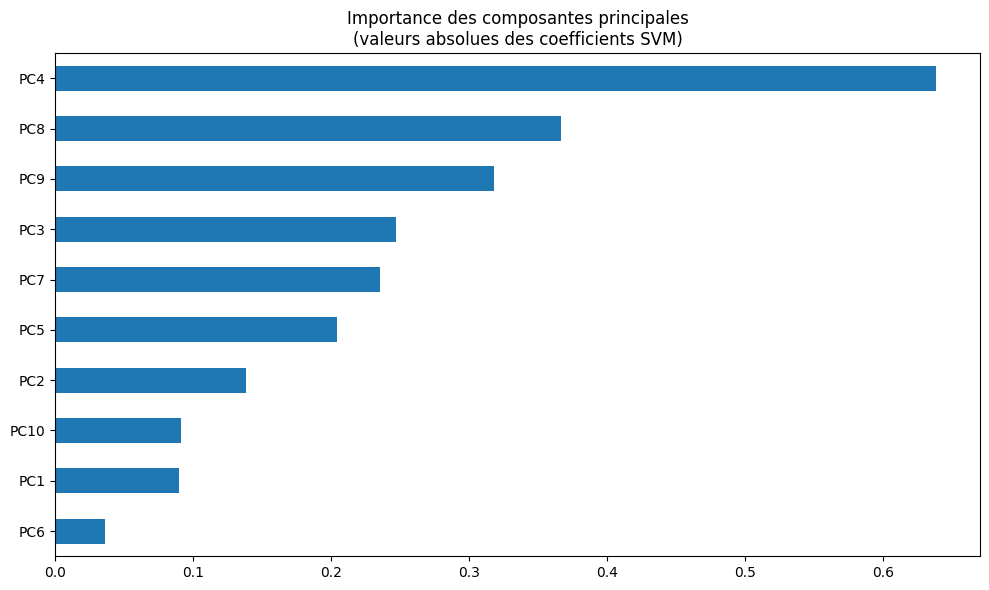

In [44]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report,
                           confusion_matrix, roc_curve, auc)
from imblearn.over_sampling import SMOTE  # Alternative pour l'équilibrage
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(columns=['Robot_ProtectiveStop', 'Timestamp'])
y = df['Robot_ProtectiveStop']

# 3. PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# 4. Équilibrage des classes
print("Distribution des classes avant équilibrage:")
print(y.value_counts())

svm = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)

# 5. Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 6. Entraînement
svm.fit(X_train, y_train)

# 7. Prédiction et évaluation
y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)[:, 1]  # Probabilités pour la courbe ROC

print("\nDistribution des classes dans le test set:")
print(pd.Series(y_test).value_counts())

# 8. Métriques complètes
print("\n" + "="*50)
print("Évaluation du modèle SVM avec équilibrage des classes")
print("="*50)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nRapport de classification détaillé:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Protective Stop']))

# 9. Visualisations améliorées
plt.figure(figsize=(15, 5))

# Matrice de confusion
plt.subplot(1, 2, 1)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Protective Stop'],
            yticklabels=['Normal', 'Protective Stop'])
plt.title('Matrice de confusion\n(Classes équilibrées)', pad=20)
plt.ylabel('Vérité terrain')
plt.xlabel('Prédictions')

# Courbe ROC
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC', pad=20)
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# 10. Feature importance (pour SVM linéaire)
if svm.kernel == 'linear':
    plt.figure(figsize=(10, 6))
    importance = pd.Series(np.abs(svm.coef_[0]),
                          index=[f'PC{i+1}' for i in range(10)])
    importance.sort_values().plot(kind='barh')
    plt.title('Importance des composantes principales\n(valeurs absolues des coefficients SVM)')
    plt.tight_layout()
    plt.show()